In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [53]:
def detect_interactions(distances, min_consecutive=60, threshold=250):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [54]:
directory = r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Imputed"
files = os.listdir(directory)

result_dataframes = {}

for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    
    # Create a new DataFrame to store the results
    new_df = pd.DataFrame()

    # Add relevant data to the new DataFrame
    new_df["Behavior"] = df['Behavior']

    new_df['Client_Mouth_X_top'] = df['Client_Mouth']
    new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
    new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

    new_df['Client_S1_X_top'] = df['Client_Spine_1']
    new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']

    new_df['Client_S2_X_top'] = df['Client_Spine_2']
    new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']

    new_df['Client_Tail_X_top'] = df['Client_Tail']
    new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
    new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']

    new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
    new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
    new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

    new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
    new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
    new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

    new_df['Cleaner_Spine2_X_top'] = df['Cleaner_Spine2']
    new_df['Cleaner_Spine2_Y_top'] = df['Cleaner_Spine2.1']
    new_df['Cleaner_Spine2_Z_front']= df['Cleaner_Spine2_Front.1']

    new_df['Cleaner_Tail_X_top'] = df['Cleaner_Tail']
    new_df['Cleaner_Tail_Y_top'] = df['Cleaner_Tail.1']
    new_df['Cleaner_Tail_Z_front']= df['Cleaner_Tail_Front.1']

    new_df["Frame"] = df['Frame']
    
    # Create a new column in new_df to store the centroid for each row
    new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_top', 'Client_S1_X_top', 'Client_S2_X_top', 'Client_Tail_X_top']].mean(axis=1)
    new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_top', 'Client_S1_Y_top', 'Client_S2_Y_top', 'Client_Tail_Y_top']].mean(axis=1)
    new_df['Client_Centroid_Z'] = new_df[['Client_Mouth_Z_front', 'Client_S1_Z_front', 'Client_S2_Z_front', 'Client_Tail_Z_front']].mean(axis=1)
    
    # Create a new column in new_df to store the centroid for each row
    new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top', 'Cleaner_Spine2_X_top', 'Cleaner_Tail_X_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top', 'Cleaner_Spine2_Y_top', 'Cleaner_Tail_Y_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front', 'Cleaner_Spine2_Z_front', 'Cleaner_Tail_Z_front']].mean(axis=1)
    
    # Calculate the Euclidean distance between the two centroids for each row
    new_df['Distance'] = np.sqrt(
        (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
        (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2 +
        (new_df['Client_Centroid_Z'] - new_df['Cleaner_Centroid_Z'])**2
    )
    
    new_df["Interaction_Predictions"] = "background" #Inicialization of predictions
    
    result_dataframes[file.split("_")[0]] = new_df

## Histograms

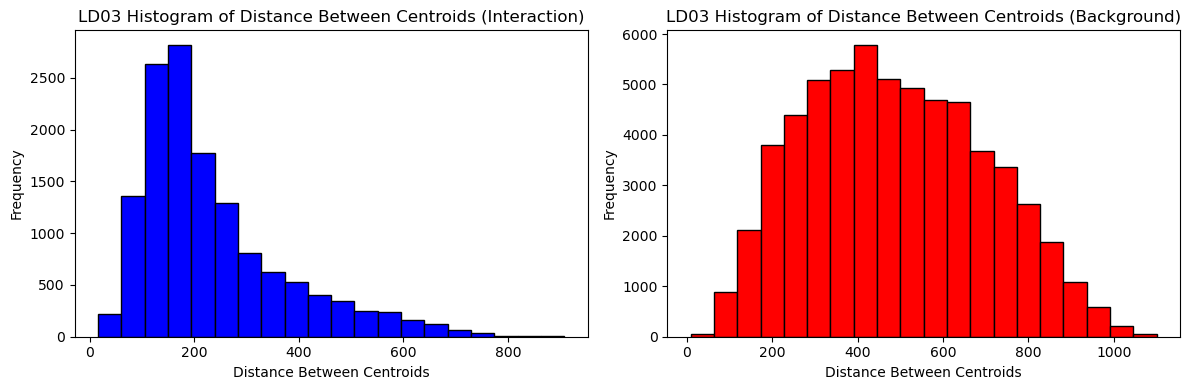

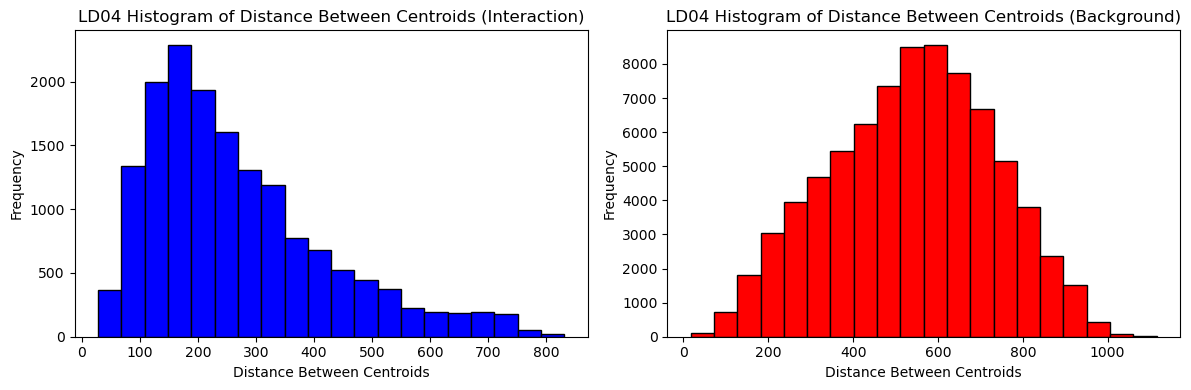

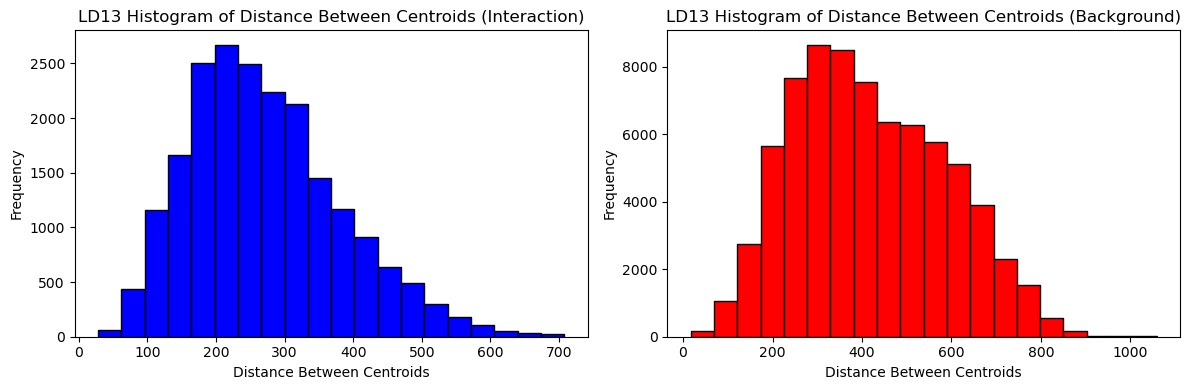

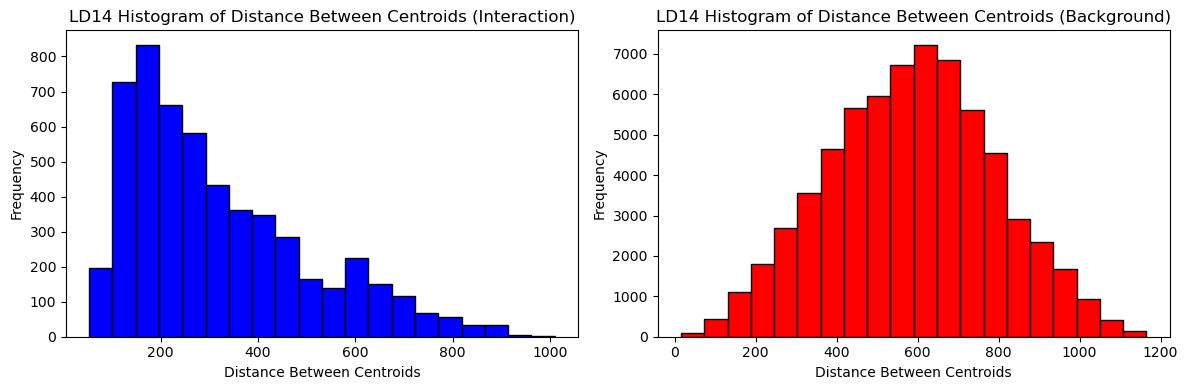

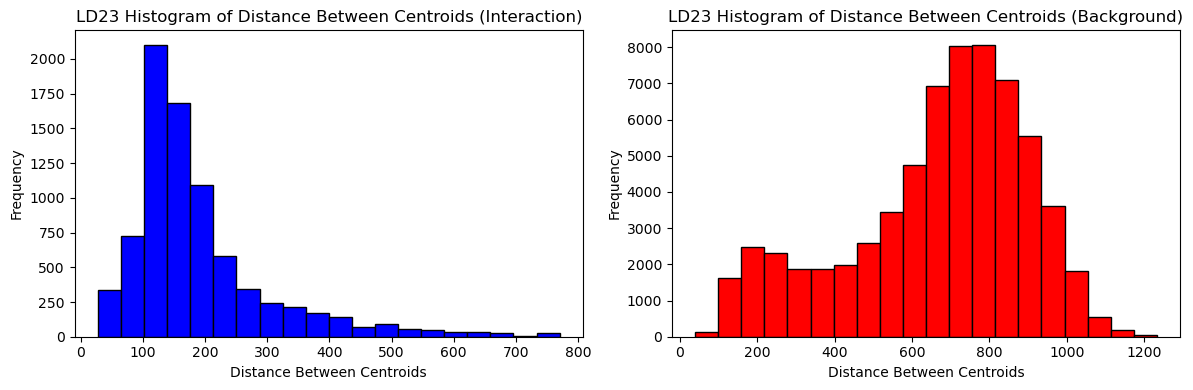

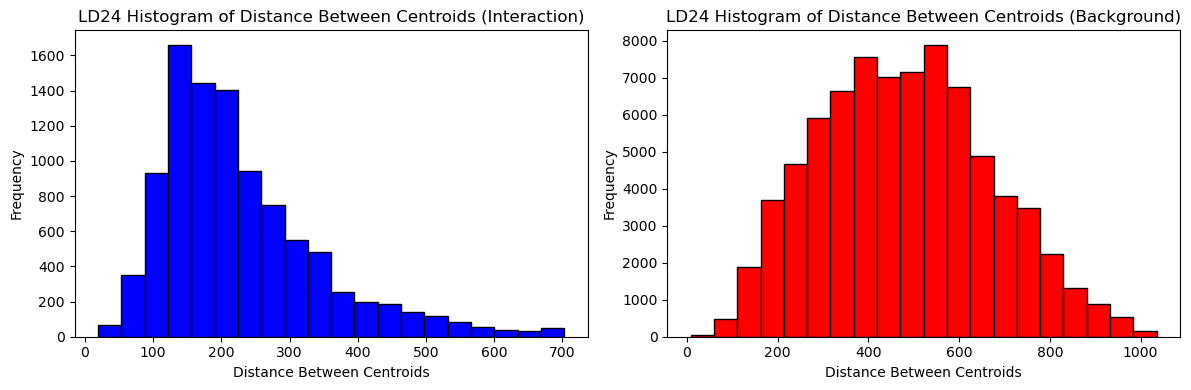

In [33]:
for data_frame in result_dataframes:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the first histogram (interaction)
    ax1.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
    ax1.set_xlabel('Distance Between Centroids')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{data_frame} Histogram of Distance Between Centroids (Interaction)')

    # Plot the second histogram (non-interaction)
    ax2.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
    ax2.set_xlabel('Distance Between Centroids')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'{data_frame} Histogram of Distance Between Centroids (Background)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    plt.show()

In [52]:
for data_frame in result_dataframes:
    print(data_frame, "\n", result_dataframes[data_frame]["Behavior"].value_counts(), "\n")

LD03 
 Background     60305
interaction    13722
posing           368
jolts              7
Name: Behavior, dtype: int64 

LD04 
 Background     78211
interaction    15878
posing           303
jolts             92
TS                16
Name: Behavior, dtype: int64 

LD13 
 Background     74007
interaction    20716
posing            52
jolts             28
Name: Behavior, dtype: int64 

LD14 
 Background     65351
interaction     5423
posing            61
Name: Behavior, dtype: int64 

LD23 
 Background     64956
interaction     8031
posing           112
jolts             13
Name: Behavior, dtype: int64 

LD24 
 Background     77008
interaction     9728
posing            53
jolts             13
Name: Behavior, dtype: int64 



In [70]:
# Create a dictionary to store summary values for each DataFrame
summary_values = {}

for data_frame in result_dataframes:
    total_frames = 0
    correctly_detected_event = 0
    total = 0
    correctly_frame_count = 0

    interactions = detect_interactions(result_dataframes[data_frame]["Distance"])

    for interaction in interactions:

        start_frame, end_frame = interaction

        if end_frame - start_frame + 1 >= 15:
            total += 1  # Increment the total count for eligible interactions
            total_frames += end_frame - start_frame + 1
            selected_data = result_dataframes[data_frame].loc[start_frame:end_frame, "Behavior"]
            mode_value = stats.mode(selected_data).mode[0]

            if mode_value == "interaction":
                correctly_detected_event +=1
                correctly_frame_count += end_frame - start_frame + 1

            # Store the prediction in the new column
            result_dataframes[data_frame].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value
            
            if total == 1:
                print(f"\nData from: {data_frame}")
            
            # Store the summary values in the summary_values dictionary
            summary_values[data_frame] = {
            "total_frames": total_frames,
            "correctly_detected_event": correctly_detected_event,
            "total": total,
            "correctly_frame_count": correctly_frame_count
            }
            
            print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")


Data from: LD03
Interaction detected from frame 1583 to 1807 (Duration: 225 frames) with a true Behavior of interaction
Interaction detected from frame 1999 to 2143 (Duration: 145 frames) with a true Behavior of interaction
Interaction detected from frame 2473 to 2700 (Duration: 228 frames) with a true Behavior of interaction
Interaction detected from frame 2818 to 2883 (Duration: 66 frames) with a true Behavior of interaction
Interaction detected from frame 5322 to 5437 (Duration: 116 frames) with a true Behavior of interaction
Interaction detected from frame 6838 to 6937 (Duration: 100 frames) with a true Behavior of interaction
Interaction detected from frame 6991 to 7093 (Duration: 103 frames) with a true Behavior of interaction
Interaction detected from frame 7994 to 8076 (Duration: 83 frames) with a true Behavior of interaction
Interaction detected from frame 8697 to 8799 (Duration: 103 frames) with a true Behavior of interaction
Interaction detected from frame 10298 to 10360 (D

C:\Users\raulo\AppData\Local\Temp\ipykernel_24500\2446015450.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\AppData\Local\Temp\ipykernel_24500\2446015450.py:20: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_value = stats.mode(selected_data).mode[0]


In [73]:
for data_frame, summary in summary_values.items():
    total_frames = summary['total_frames']
    correctly_frame_count = summary['correctly_frame_count']
    total_detected_events = summary['total']
    correctly_detected_events = summary['correctly_detected_event']

    accuracy = (correctly_frame_count / total_frames) * 100

    print(f"Data from: {data_frame}")
    print(f"There were {correctly_frame_count} frames correctly classified, out of a total of {total_frames} frames classified as interaction.")
    print(f"This results in an accuracy of {accuracy:.2f}%.")
    print(f"There were a total of {correctly_detected_events} events detected correctly, out of {total_detected_events} total events detected.")
    print("")

Data from: LD03
There were 9111 frames correctly classified, out of a total of 11973 frames classified as interaction.
This results in an accuracy of 76.10%.
There were a total of 50 events detected correctly, out of 79 total events detected.

Data from: LD04
There were 4926 frames correctly classified, out of a total of 6027 frames classified as interaction.
This results in an accuracy of 81.73%.
There were a total of 46 events detected correctly, out of 59 total events detected.

Data from: LD13
There were 6306 frames correctly classified, out of a total of 11119 frames classified as interaction.
This results in an accuracy of 56.71%.
There were a total of 57 events detected correctly, out of 110 total events detected.

Data from: LD14
There were 2055 frames correctly classified, out of a total of 2483 frames classified as interaction.
This results in an accuracy of 82.76%.
There were a total of 16 events detected correctly, out of 22 total events detected.

Data from: LD23
There wer

In [77]:
interaction_counts = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                interaction_count += 1
                current_group = "interaction"
        else:
            current_group = None  # Reset the group if behavior is not "interaction"

    interaction_counts[data_frame_name] = interaction_count

In [80]:
interaction_counts_60 = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0
    current_group_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                current_group_count = 1
                current_group = "interaction"
            else:
                current_group_count += 1
        else:
            if current_group_count > 60:
                interaction_count += 1
            current_group = None  # Reset the group if behavior is not "interaction"
            current_group_count = 0

    # Check if the last group, if any, was an "interaction" group and met the condition
    if current_group_count > 60:
        interaction_count += 1

    interaction_counts_60[data_frame_name] = interaction_count

In [85]:
print("all",interaction_counts)
print("+60",interaction_counts_60)

all {'LD03': 70, 'LD04': 77, 'LD13': 85, 'LD14': 34, 'LD23': 32, 'LD24': 52}
+60 {'LD03': 64, 'LD04': 68, 'LD13': 70, 'LD14': 29, 'LD23': 25, 'LD24': 44}
